In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import re  

# Download the stopwords list if you haven't already
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Federico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
path = "Scripts TBBT.csv"
df = pd.read_csv(path,sep=",", skipinitialspace = True, engine ="python")

In [11]:
# Let's choose a character to analyse

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


# 1.

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

To answer this question we will have to perform sentence and word tokenization. To do so we will lowercase the text immediately and remove the punctation only after sentence tokenization. 


In [12]:
# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Sentence Tokenization
df_character["sentences"] = df_character['dialogue'].apply(sent_tokenize)

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Word tokenization using the contractions library
import contractions
df_character['words'] = (df_character['dialogue'].apply(contractions.fix)).str.split()

# Using split instead of word_tokenize to handle apostrophes:
#  "there's" as two words ("there" and "is"), instead of 3 ("there" "'" "s")

# Display the DataFrame
df_character

,episode_name,dialogue,person_scene,sentences,words
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,[ So if a photon is directed through a plane w...,"[So, if, a, photon, is, directed, through, a, ..."
3,Series 01 Episode 01 – Pilot Episode,There’s no point I just think it’s a good ide...,Sheldon,"[ There’s no point, I just think it’s a good i...","[There, is, no, point, I, just, think, it, is,..."
10,Series 01 Episode 01 – Pilot Episode,I think this is the place,Sheldon,[I think this is the place.],"[I, think, this, is, the, place]"
14,Series 01 Episode 01 – Pilot Episode,Leonard I don’t think I can do this,Sheldon,"[ Leonard, I don’t think I can do this.]","[Leonard, I, do, not, think, I, can, do, this]"
16,Series 01 Episode 01 – Pilot Episode,No We are committing genetic fraud There’s no...,Sheldon,"[ No., We are committing genetic fraud., There...","[No, We, are, committing, genetic, fraud, Ther..."
...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,Uh breakfast yes lunch no I did have a cough ...,Sheldon,"[ Uh, breakfast yes, lunch no., I did have a c...","[Uh, breakfast, yes, lunch, no, I, did, have, ..."
54399,Series 10 Episode 24 – The Long Distance Disso...,How thoughtful Thank you,Sheldon,"[How thoughtful., Thank you.]","[How, thoughtful, Thank, you]"
54401,Series 10 Episode 24 – The Long Distance Disso...,And I with you Question are you seeking a rom...,Sheldon,"[ And I with you., Question, are you seeking a...","[And, I, with, you, Question, are, you, seekin..."
54403,Series 10 Episode 24 – The Long Distance Disso...,Well that would raise a number of problems We...,Sheldon,"[ Well, that would raise a number of problems....","[Well, that, would, raise, a, number, of, prob..."


In [13]:
# Counting the words and the sentences per dialogue

df_character['words_count'] = df_character['words'].apply(lambda x: len(x))
df_character['sentences_count'] = df_character['sentences'].apply(lambda x: len(x))

df_character

,episode_name,dialogue,person_scene,sentences,words,words_count,sentences_count
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,[ So if a photon is directed through a plane w...,"[So, if, a, photon, is, directed, through, a, ...",57,2
3,Series 01 Episode 01 – Pilot Episode,There’s no point I just think it’s a good ide...,Sheldon,"[ There’s no point, I just think it’s a good i...","[There, is, no, point, I, just, think, it, is,...",15,1
10,Series 01 Episode 01 – Pilot Episode,I think this is the place,Sheldon,[I think this is the place.],"[I, think, this, is, the, place]",6,1
14,Series 01 Episode 01 – Pilot Episode,Leonard I don’t think I can do this,Sheldon,"[ Leonard, I don’t think I can do this.]","[Leonard, I, do, not, think, I, can, do, this]",9,1
16,Series 01 Episode 01 – Pilot Episode,No We are committing genetic fraud There’s no...,Sheldon,"[ No., We are committing genetic fraud., There...","[No, We, are, committing, genetic, fraud, Ther...",37,4
...,...,...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,Uh breakfast yes lunch no I did have a cough ...,Sheldon,"[ Uh, breakfast yes, lunch no., I did have a c...","[Uh, breakfast, yes, lunch, no, I, did, have, ...",21,2
54399,Series 10 Episode 24 – The Long Distance Disso...,How thoughtful Thank you,Sheldon,"[How thoughtful., Thank you.]","[How, thoughtful, Thank, you]",4,2
54401,Series 10 Episode 24 – The Long Distance Disso...,And I with you Question are you seeking a rom...,Sheldon,"[ And I with you., Question, are you seeking a...","[And, I, with, you, Question, are, you, seekin...",13,2
54403,Series 10 Episode 24 – The Long Distance Disso...,Well that would raise a number of problems We...,Sheldon,"[ Well, that would raise a number of problems....","[Well, that, would, raise, a, number, of, prob...",21,3


We will now calculate the average words and sentences for episodes

In [14]:
total_episodes = df['episode_name'].nunique()

total_words = df_character['words_count'].sum()
total_sentences = df_character['sentences_count'].sum()

average_words_per_episode = total_words / total_episodes
print(f"Average words for episodes: {average_words_per_episode:.2f}")

average_sentences_per_episode = total_sentences / total_episodes
print(f"Average senteces for episodes: {average_sentences_per_episode:.2f}")


Average words for episodes: 774.94
Average senteces for episodes: 94.48


To calculate the average number of words and sentences for episode we have to:

1. Create a "season" column based on the "episode_name."
1. Group the data by the newly created "season" and episode.
1. Calculate the number of episodes in each season.
1. Calculate the total number of words for each episode within the selected character's dialogue.
1. Finally, compute the average number of words spoken per episode per season.

In [15]:
# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# For words

# Group by season and episode, calculate the sum of words for each episode
episode_word_counts = df_character.groupby(['season', 'episode_name'])['words_count'].sum().reset_index()

# Calculate the number of episodes in each season
season_episode_counts = episode_word_counts.groupby('season')['episode_name'].count()

# Calculate the total number of words per season
season_word_counts = episode_word_counts.groupby('season')['words_count'].sum()

# Compute the average number of words spoken per episode per season
average_words_per_episode_per_season = season_word_counts / season_episode_counts

print("Average Words Spoken per Episode per Season for Character:", assigned_character)
print(average_words_per_episode_per_season)

print(f"Average words for episodes: {average_words_per_episode:.2f}")

# For sentences

# Group by season and episode, calculate the sum of words for each episode
episode_sentences_counts = df_character.groupby(['season', 'episode_name'])['sentences_count'].sum().reset_index()

# Calculate the total number of sentences per season
season_sentences_counts = episode_sentences_counts.groupby('season')['sentences_count'].sum()

# Compute the average number of sentences spoken per episode per season
average_sentences_per_episode_per_season = season_sentences_counts / season_episode_counts

print("Average sentences Spoken per Episode per Season for Character:", assigned_character)
print(average_sentences_per_episode_per_season)

print(f"Average sentences for episodes: {average_sentences_per_episode:.2f}")


Average Words Spoken per Episode per Season for Character: Sheldon
season
1     902.529412
2     881.217391
3     905.173913
4     801.708333
5     753.333333
6     693.250000
7     696.791667
8     735.125000
9     737.083333
10    690.291667
dtype: float64
Average words for episodes: 774.94
Average sentences Spoken per Episode per Season for Character: Sheldon
season
1      94.352941
2     100.695652
3     110.652174
4     104.125000
5      96.041667
6      88.416667
7      88.375000
8      88.583333
9      90.083333
10     84.416667
dtype: float64
Average sentences for episodes: 94.48


There is a stable decrease in the average number of words spoken per episode and the average number of sentences per episode as the series progresses through all the seasons.

# 2. 

Globally, over all episodes within the first 10 seasons, how many times does your
character mention nouns, and person names? 

Make a Wordcloud of this tag/entity to
have a clear visualization which nouns/person names are mostly used by your character.

In [20]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


In [21]:
import spacy
from collections import Counter


# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

df_character['dialogue'] = df_character['dialogue'].str.lower()

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Remove punctuation using the default pattern
# df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Process the entire dialogue column using nlp.pipe()
processed_dialogues = nlp.pipe(df_character["dialogue"])

# Extract nouns and proper nouns, remove stop words, and flatten the list
noun_propn_list = [
    token.text 
    for doc in processed_dialogues 
    for token in doc 
    if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop and token.text not in string.punctuation
]

# Count the occurrences of each type
type_counter = Counter(noun_propn_list)

# Print the ten most frequent types
print("Ten most frequent types:")
for token, count in type_counter.most_common(10):
    print(f"{token}: {count}")


Ten most frequent types:
knock: 838
leonard: 720
penny: 504
time: 384
people: 209
man: 198
way: 193
night: 159
day: 155
course: 152


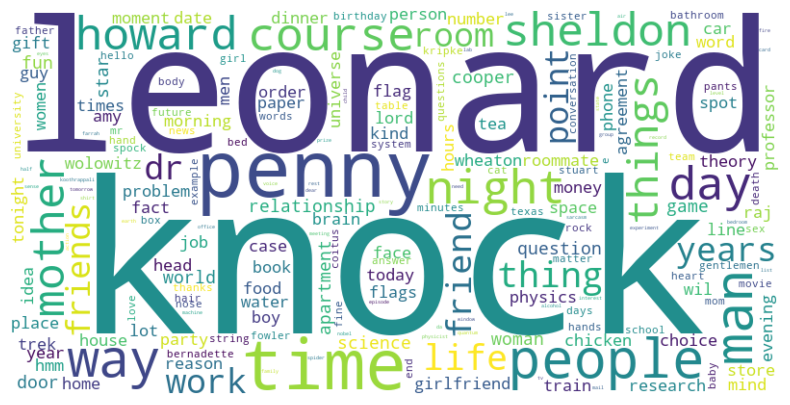

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(type_counter)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3.

What are the most important words mentioned by your character? Do this analysis
per episode, per season and overall over the first 10 seasons. To achieve this task,
please first make a bag-of-words and/or use the TF-IDF statistical principle. Remark:
You can try to make a Wordcloud for visualization, based on the given bag-of-words.

In [27]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

In [ ]:
from nltk.corpus import stopwords
import re


# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Word tokenization using the contractions library
df_character['words'] = (df_character['dialogue'].apply(contractions.fix)).str.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
df_character["words"] = df_character["words"].apply(lambda words: [word for word in words if word not in stop_words])


In [35]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

df_character['dialogue'] = df_character['dialogue'].str.lower()

# Process the entire dialogue column using nlp.pipe()
processed_dialogues = nlp.pipe(df_character["dialogue"])

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Extract nouns and proper nouns, remove stop words, and flatten the list for each row
df_character['words'] = df_character['dialogue'].apply(lambda text: [
    token.text 
    for token in nlp(text) 
    if token.pos_ in ["NOUN", "PROPN","VERB","ADV"] and not token.is_stop and token.text not in string.punctuation
])

After cleaning and preprocessing the text data by removing punctuation, converting to lowercase, and removing stop words, we can proceed creating a bag-of-words (TF-IDF representation will be done after)

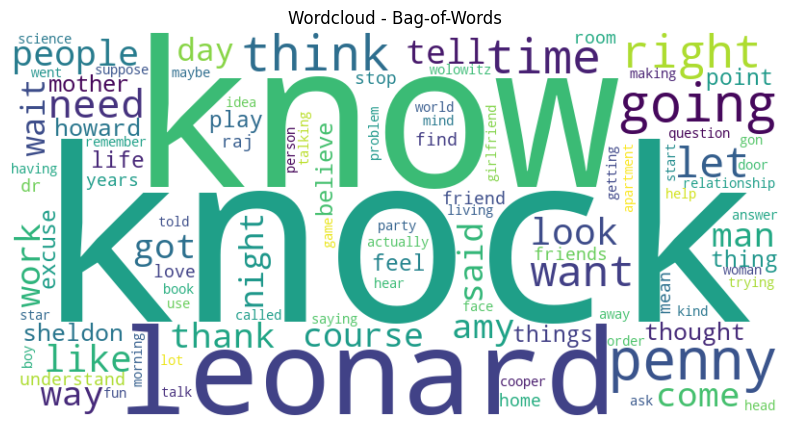

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Combine the lists of words into space-separated strings
df_character['cleaned_text'] = df_character['words'].apply(lambda x: ' '.join(x))

# Create a bag-of-words representation with the custom tokenizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df_character['cleaned_text'])

# Sum the counts across all documents to get the total frequency of each word
word_frequencies = np.sum(bow_matrix, axis=0)

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - Bag-of-Words')
plt.show()


In [40]:
# Identify the top 10 most frequent words
top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]
top_word_frequencies = [word_freq_dict[word] for word in top_words]

# Print the top 10 most frequent words and their frequencies
for word, frequency in zip(top_words, top_word_frequencies):
    print(f"{word}: {frequency} times")


knock: 860 times
know: 825 times
leonard: 739 times
penny: 504 times
going: 462 times
think: 395 times
time: 384 times
right: 358 times
want: 315 times
let: 300 times


What we did here is not particularly different from what was done for question two, apart from the inclusion of verbs and adverbs. To achieve more interesting results, we will apply TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_character is your DataFrame with 'dialogue' column
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Define a function to process each dialogue and extract relevant words based on POS
def process_dialogue(dialogue):
    doc = nlp(dialogue)
    relevant_words = [
        token.text
        for token in doc
        if token.pos_ in ["NOUN", "PROPN", "ADJ", "VERB"] and not token.is_stop and not token.is_punct
    ]
    return ' '.join(relevant_words)

# Apply the function to each dialogue in the DataFrame
df_character['processed_dialogue'] = df_character['dialogue'].apply(process_dialogue)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the processed dialogues to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df_character['processed_dialogue'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [51]:
# Calculate the sum of TF-IDF scores for each term across all documents
term_importance = tfidf_df.sum(axis=0)

# Create a DataFrame to display the term importance
term_importance_df = pd.DataFrame({
    'Term': term_importance.index,
    'Importance': term_importance.values
})

# Sort the DataFrame by importance in descending order
term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important terms
top_terms = term_importance_df.head(10)
print(top_terms)


          Term  Importance
6392      know  187.102891
6594   leonard  183.870809
4943     going  129.287824
4957      good  127.052772
11624    think  119.365190
8339     penny  115.291463
6387     knock  103.625605
12494     want  103.067199
11587    thank  100.219528
11701     time   90.014299


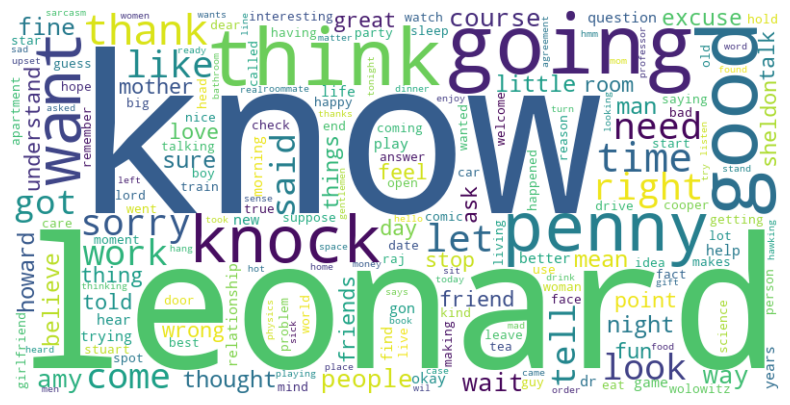

In [47]:
# Create a dictionary with terms and their importance scores
term_importance_dict = dict(zip(term_importance_df['Term'], term_importance_df['Importance']))

# Generate a word cloud using the TF-IDF scores as weights
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_importance_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now we can do the same by series and episodes (only with TF-IDF)

In [54]:

# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# Initialize an empty list to store DataFrames for each season
season_dfs = []

# Loop through each season
for season in range(1, 11):
    # Filter the DataFrame for the current season using .loc
    season_df = df_character.loc[df_character['season'] == season].copy()

    # Apply the function to each dialogue in the filtered DataFrame
    season_df['processed_dialogue'] = season_df['dialogue'].apply(process_dialogue)

    # Create a TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the processed dialogues to obtain the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(season_df['processed_dialogue'])

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(season_df['cleaned_text'])

    # Calculate the sum of TF-IDF scores for each term across all documents
    term_importance = tfidf_df.sum(axis=0)

    # Create a DataFrame to display the term importance
    term_importance_df = pd.DataFrame({
        'Term': term_importance.index,
        'Importance': term_importance.values
    })

    # Sort the DataFrame by importance in descending order
    term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Create a list of top words for the current season
    top_words_for_season = term_importance_df['Term'].tolist()
    
    # Create a DataFrame for the current season's top words
    season_top_words_df = pd.DataFrame({'Season': [season] * 10, 'Top Words': top_words_for_season})
    
    # Append the DataFrame to the list
    season_dfs.append(season_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_season = pd.concat(season_dfs, ignore_index=True)

# Print the results
for season in range(1, 11):
    print(f"Season {season}: ", end="")
    for word in range(0, 10):
        words_for_season = top_words_per_season.loc[top_words_per_season['Season'] == season, 'Top Words'].iloc[word]
        print(f"{words_for_season} ", end="")
    print()  # Add a newline after each season


Season 1: leonard think know going penny good time want need course 
Season 2: leonard penny know going good knock work let time want 
Season 3: leonard knock penny going good want know sorry thank right 
Season 4: leonard know thank going penny good think knock howard amy 
Season 5: leonard know going knock good penny time think like let 
Season 6: know leonard want think knock going let good time thank 
Season 7: know leonard think good going want penny right come time 
Season 8: know leonard good think want thank right going let knock 
Season 9: know leonard think thank going good got time like let 
Season 10: know leonard think thank need want going amy good room 


By episode

In [55]:
import re

# Extract season and episode numbers using regular expressions
season_episode_pattern = re.compile(r'Series (\d+) Episode (\d+)')
matches = df_character['episode_name'].str.extract(season_episode_pattern)

# Combine the extracted season and episode numbers to create the new column
df_character['season_episode'] = matches[0].str.zfill(2) + '-' + matches[1].str.zfill(2)

# Print the DataFrame to check the new column
print(df_character[['episode_name', 'season_episode']])


                                            episode_name season_episode
1                   Series 01 Episode 01 – Pilot Episode          01-01
3                   Series 01 Episode 01 – Pilot Episode          01-01
10                  Series 01 Episode 01 – Pilot Episode          01-01
14                  Series 01 Episode 01 – Pilot Episode          01-01
16                  Series 01 Episode 01 – Pilot Episode          01-01
...                                                  ...            ...
54397  Series 10 Episode 24 – The Long Distance Disso...          10-24
54399  Series 10 Episode 24 – The Long Distance Disso...          10-24
54401  Series 10 Episode 24 – The Long Distance Disso...          10-24
54403  Series 10 Episode 24 – The Long Distance Disso...          10-24
54405  Series 10 Episode 24 – The Long Distance Disso...          10-24

[11484 rows x 2 columns]


In [56]:
# Initialize an empty list to store DataFrames for each episode
episode_dfs = []

# Loop through each episode
for season_episode in df_character['season_episode'].unique():
    # Filter the DataFrame for the current episode using .loc
    episode_df = df_character.loc[df_character['season_episode'] == season_episode].copy()

    # Apply the function to each dialogue in the filtered DataFrame
    episode_df['processed_dialogue'] = episode_df['dialogue'].apply(process_dialogue)

    # Create a TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the processed dialogues to obtain the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(episode_df['processed_dialogue'])

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(episode_df['cleaned_text'])

    # Calculate the sum of TF-IDF scores for each term across all documents
    term_importance = tfidf_df.sum(axis=0)

    # Create a DataFrame to display the term importance
    term_importance_df = pd.DataFrame({
        'Term': term_importance.index,
        'Importance': term_importance.values
    })

    # Sort the DataFrame by importance in descending order
    term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False).head(10)
    
    # Create a list of top words for the current episode
    top_words_for_episode = term_importance_df['Term'].tolist()
    
    # Create a DataFrame for the current episode's top words
    episode_top_words_df = pd.DataFrame({'Episode': [season_episode] * 10, 'Top Words': top_words_for_episode})

    # Append the DataFrame to the list
    episode_dfs.append(episode_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_episode = pd.concat(episode_dfs, ignore_index=True)

# Print the results
for episode_name in df_character['season_episode'].unique():
    print(f"{episode_name}: ", end="")
    for word in range(0, 5):
        words_for_episode = top_words_per_episode.loc[top_words_per_episode['Episode'] == episode_name, 'Top Words'].iloc[word]
        print(f"{words_for_episode} ", end="")
    print()  # Add a newline after each episode


01-01: hi think leonard going sit 
01-02: sarcasm penny think check hang 
01-03: leonard tell date lord good 
01-04: going know time morning mom 
01-05: leonard boy big lucky come 
01-06: costume good people party doppler 
01-07: night halo penny know good 
01-08: punchali diet princess indian know 
01-09: little work look idea know 
01-10: knock leonard penny lied leo 
01-11: soup sick leonard need want 
01-12: leonard goodbye sure work think 
01-13: course protest answer team formal 
01-14: time machine bid turn know 
01-15: sister missy wants rajesh way 
01-16: think leonard dvd know suppose 
01-17: schrodinger cat chicken mistake assumed 
02-01: tell secret leonard penny know 
02-02: mean leonard penny leslie know 
02-03: penny tom danger stand bedroom 
02-04: people tell smiles lucky want 
02-05: know penny work good drive 
02-06: clause nice girl eat dinner 
02-07: penny strike thank night laundry 
02-08: going leonard office believe ask 
02-09: stephanie leonard good come relati

# 4.

Examine the co-occurence of words for your character by using the Positive Pointwise Mutual Information measurement. Which words are commonly used together in his/her dialogues? Remark: You can try to make a Word-Word co-occurence matrix.

In [37]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

from nltk.corpus import stopwords
import re

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Lowercase the text
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Word tokenization using the contractions library
df_character['words'] = (df_character['dialogue'].apply(contractions.fix)).str.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
df_character["words"] = df_character["words"].apply(lambda words: [word for word in words if word not in stop_words and word != '’'])


CountVectorizer is a powerful tool for text preprocessing in machine learning, and it automatically handles tokenization, counting, and building the vocabulary.

In [38]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# sentences = df_character["words"].apply(lambda words: ' '.join(words))

# Tokenize using NLTK
# tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = df_character["words"]

# Create a count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_sentences])

# Get the vocabulary and token-to-index mapping
vocabulary = vectorizer.get_feature_names_out()
tok2indx = {tok: indx for indx, tok in enumerate(vocabulary)}

def generate_skipgrams(tokens, back_window, front_window, tok2indx):
    skipgram_counts = Counter()

    for ii_word, word in enumerate(tokens):
        word_index = tok2indx.get(word, None)
        if word_index is not None:
            ii_context_min = max(0, ii_word - back_window)
            ii_context_max = min(len(tokens) - 1, ii_word + front_window)
            ii_contexts = [ii for ii in range(ii_context_min, ii_context_max + 1) if ii != ii_word]

            for ii_context in ii_contexts:
                context_word = tokens[ii_context]
                context_index = tok2indx.get(context_word, None)

                if context_index is not None:
                    skipgram = (word_index, context_index)
                    skipgram_counts[skipgram] += 1

    return skipgram_counts


# Define back_window and front_window
back_window = 2
front_window = 2

# Initialize the skipgram counter
skipgram_counts = Counter()

# Generate skipgrams
for tokens in tokenized_sentences:
    current_skipgram_counts = generate_skipgrams(tokens, back_window, front_window, tok2indx)
    skipgram_counts += current_skipgram_counts

# Print results
print('done')
print('number of skipgrams: {}'.format(len(skipgram_counts)))
most_common = [
    (vocabulary[sg[0][0]], vocabulary[sg[0][1]], sg[1]) 
    for sg in skipgram_counts.most_common(10)]
print('most common: {}'.format(most_common))


done
number of skipgrams: 214782
most common: [('knock', 'knock', 1936), ('knock', 'penny', 393), ('penny', 'knock', 393), ('knock', 'leonard', 195), ('leonard', 'knock', 195), ('let', 'us', 155), ('us', 'let', 155), ('would', 'like', 145), ('like', 'would', 145), ('knock', 'amy', 138)]


This code creates a sparse matrix (wwcnt_mat) where the rows represent words and the columns represent context words. The matrix is populated with the count values from the skipgrams.

In [45]:
from scipy.sparse import csr_matrix

# Assuming skipgram_counts is a Counter containing skipgram counts
row_indxs = []
col_indxs = []
dat_values = []
ii = 0

for (tok1, tok2), sg_count in skipgram_counts.items():
    ii += 1
    if ii % 1000000 == 0:
        print(f'finished {ii/len(skipgram_counts):.2%} of skipgrams')    
    row_indxs.append(tok1)
    col_indxs.append(tok2)
    dat_values.append(sg_count)

# Create the word-word count matrix
wwcnt_mat = csr_matrix((dat_values, (row_indxs, col_indxs)))

In [47]:
# Assuming you have already created the csr_matrix
wwcnt_mat = csr_matrix((dat_values, (row_indxs, col_indxs)))

# Convert the sparse matrix to a dense matrix
dense_matrix = wwcnt_mat.toarray()

# Print the dense matrix
print(dense_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

tok2indx = {tok: indx for indx, tok in enumerate(vocabulary)}
indx2tok = {indx: tok for tok, indx in tok2indx.items()}

# Define the ww_sim function
def ww_sim(word, mat, topn=10):
    """Calculate topn most similar words to word"""
    indx = tok2indx[word]
    if isinstance(mat, sparse.csr_matrix):
        v1 = mat.getrow(indx)
    else:
        v1 = mat[indx:indx+1, :]
    sims = cosine_similarity(mat, v1).flatten()
    sindxs = np.argsort(-sims)
    sim_word_scores = [(indx2tok[sindx], sims[sindx]) for sindx in sindxs[0:topn]]
    return sim_word_scores



In [49]:
similar_words = ww_sim('leonard', wwcnt_mat)

# Print the results
print(f"Words similar: {similar_words}")


Words similar: [('leonard', 1.0000000000000213), ('penny', 0.9457475302640096), ('knock', 0.9241406427453984), ('amy', 0.9034356822034696), ('leonardleonard', 0.9013107870478105), ('knockknockknock', 0.9013107870478105), ('raj', 0.8277070356206885), ('solemnly', 0.8226934267689343), ('davis', 0.8131977793236664), ('bernadette', 0.8010077730907751)]


In [50]:
similar_words = ww_sim('paper', wwcnt_mat)

# Print the results
print(f"Words similar: {similar_words}")


Words similar: [('paper', 1.0000000000000007), ('covers', 0.5346974893306041), ('cuts', 0.5329387810424111), ('disproves', 0.47295265146345866), ('purell', 0.44513190725972573), ('scissors', 0.4211474254261684), ('rock', 0.40081917624934177), ('eats', 0.3993219892120452), ('towels', 0.3780882205890919), ('wrote', 0.354646293943768)]


In [51]:
from sklearn.preprocessing import normalize
# normalize each row using L2 norm
wwcnt_norm_mat = normalize(wwcnt_mat, norm='l2', axis=1)

# demonstrate normalization
row = wwcnt_mat.getrow(10).toarray().flatten()
print(np.sqrt((row*row).sum()))

row = wwcnt_norm_mat.getrow(10).toarray().flatten()
print(np.sqrt((row*row).sum()))

1.7320508075688772
1.0


In [52]:
ww_sim('leonard', wwcnt_norm_mat)


[('leonard', 1.000000000000001),
 ('penny', 0.9457475302639955),
 ('knock', 0.9241406427453891),
 ('amy', 0.9034356822034622),
 ('leonardleonard', 0.9013107870478009),
 ('knockknockknock', 0.9013107870478009),
 ('raj', 0.8277070356206792),
 ('solemnly', 0.8226934267689258),
 ('davis', 0.8131977793236579),
 ('bernadette', 0.8010077730907673)]

In [53]:
import numpy as np
from scipy import sparse
from collections import Counter
num_skipgrams = wwcnt_mat.sum()
assert(sum(skipgram_counts.values())==num_skipgrams)
row_indxs = []
col_indxs = []
ppmi_dat_values = []    # positive pointwise mutial information

# reusable quantities
sum_over_words = np.array(wwcnt_mat.sum(axis=0)).flatten()
sum_over_contexts = np.array(wwcnt_mat.sum(axis=1)).flatten()
alpha = 0.75
sum_over_words_alpha = sum_over_words**alpha
nca_denom = np.sum(sum_over_words_alpha)

ii = 0
for (tok_word, tok_context), sg_count in skipgram_counts.items():

    ii += 1
    if ii % 1000000 == 0:
        print(f'finished {ii/len(skipgram_counts):.2%} of skipgrams')

    nwc = sg_count
    Pwc = nwc / num_skipgrams
    nw = sum_over_contexts[tok_word]
    Pw = nw / num_skipgrams
    nc = sum_over_words[tok_context]
    Pc = nc / num_skipgrams
    nca = sum_over_words_alpha[tok_context]
    Pca = nca / nca_denom

    # calculate PMI
    pmi = np.log2(Pwc / (Pw * Pc))

    ppmi = max(pmi, 0)

    row_indxs.append(tok_word)
    col_indxs.append(tok_context)

    ppmi_dat_values.append(ppmi)

ppmi_mat = sparse.csr_matrix((ppmi_dat_values, (row_indxs, col_indxs)))


In [54]:
ww_sim('leonard', ppmi_mat)


[('leonard', 1.0000000000000013),
 ('penny', 0.09690888437753527),
 ('know', 0.08766707304426231),
 ('oh', 0.08382460889433363),
 ('hofstadter', 0.08087469827302193),
 ('never', 0.08015667358760498),
 ('reign', 0.07673667225136213),
 ('want', 0.07547541453505299),
 ('riposte', 0.0752800459803738),
 ('amy', 0.0746775907175472)]

In [262]:
for sentence_tokens in tokenized_sentences:
    if 'quarterback' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))


Found  it’s football nomenclature quarterback tackled behind line scrimmage


In [57]:
ww_sim('quarterback', ppmi_mat)


[('quarterback', 1.0),
 ('tackled', 0.4775398183682991),
 ('nomenclature', 0.4493472802697539),
 ('clarified', 0.37139077621195843),
 ('chickenfried', 0.2767813495500443),
 ('canine', 0.24383851008518134),
 ('ubiquitous', 0.23944947913612655),
 ('contacted', 0.2293280881153551),
 ('anonymity', 0.20985249792343533),
 ('european', 0.20262726472275347)]

In [59]:
for sentence_tokens in tokenized_sentences:
    if 'clarified' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

for sentence_tokens in tokenized_sentences:
    if 'chickenfried' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

for sentence_tokens in tokenized_sentences:
    if 'canine' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

Found  you’re taking advantage us clarified nomenclature together
Found  football chickenfried meats
Found  oh yes canine football fans common sight texas cats however refuse wear sporting apparel sister found hard way
